# Importing libraries we need

In [5]:
%matplotlib inline 
#using this for opening pic in current window not as a prompt 

import numpy as np
from scipy import misc
import matplotlib.pyplot as plt

from matplotlib.pyplot import imread
from skimage import data

import imageio

In [6]:
photo = imageio.imread('rosette_herschel_hi.jpg')
#uploading photo

type(photo)

imageio.core.util.Array

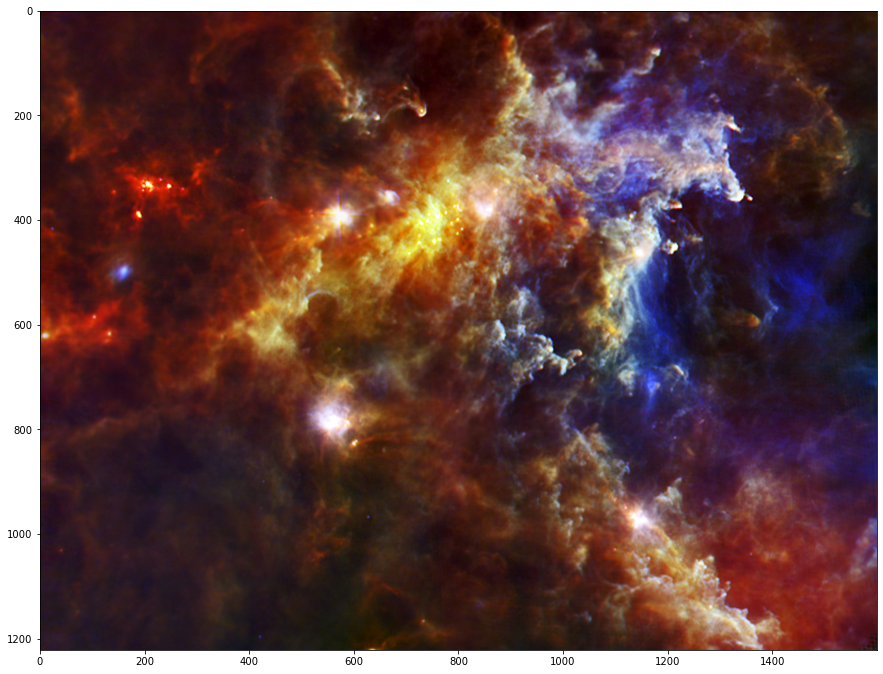

In [5]:
plt.figure(figsize=(15,15))
plt.imshow(photo)

In [6]:
photo.shape
#will print out dimensions, 3 at the end means 3layers RGB

(1222, 1600, 3)

In [8]:
photo.size
#multiply dimensions for getting size

5865600

In [9]:
photo.min(), photo.max()
#min and max value of pixels

(0, 255)

In [10]:
photo.mean()
#average value for a pixel

57.8803387547736

In [14]:
photo.mean(axis = 0).shape
#return for x axis

(1600, 3)

In [15]:
photo.mean(axis = 1).shape
#return for y axis

(1222, 3)

In [16]:
photo[400, 600]
#get rgb values for given coordinate

Array([183, 145,  98], dtype=uint8)

In [17]:
photo[400, 600, 2]
#get value for r, g, b by adding 0, 1, 2 respectively

98

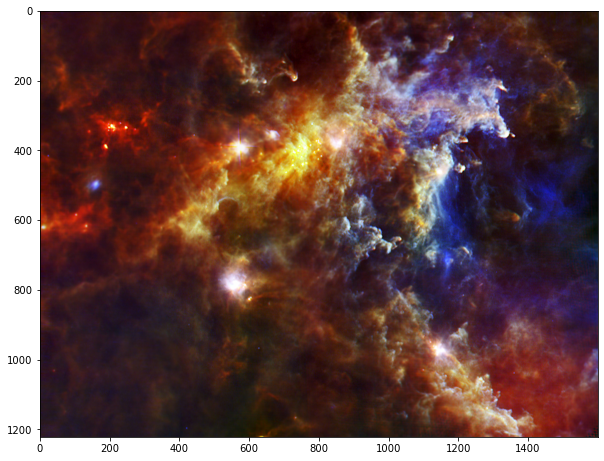

In [20]:
photo[400, 600, :] = 0
#will make that point black

plt.figure(figsize=(10,10))
plt.imshow(photo)

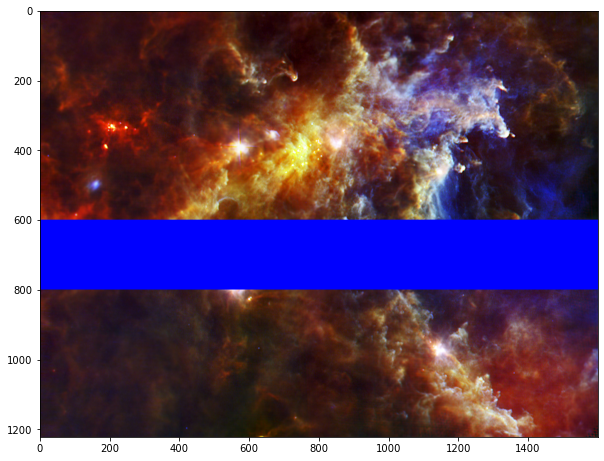

In [28]:
photo[600:800, :, 0] = 0
#set red value 0 for all pixels in given coordinates
photo[600:800, :, 1] = 0
#set green value 0 for all pixels in given coordinates
photo[600:800, :, 2] = 255
#set blue value 255 for all pixels in given coordinates


plt.figure(figsize=(10,10))
plt.imshow(photo)

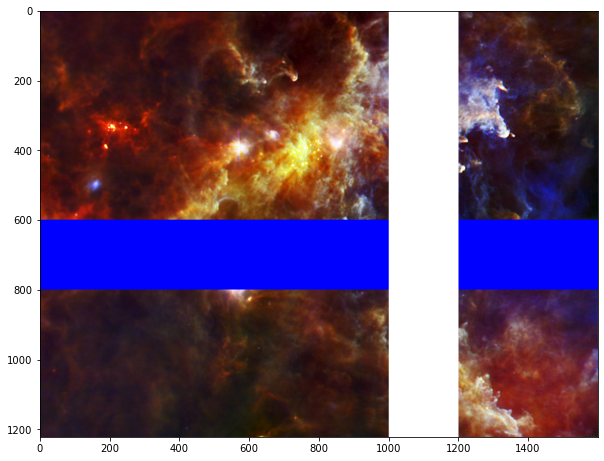

In [30]:
photo[:, 1000:1200, :] = 255
#set white for all pixels in given coordinates

plt.figure(figsize=(10,10))
plt.imshow(photo)

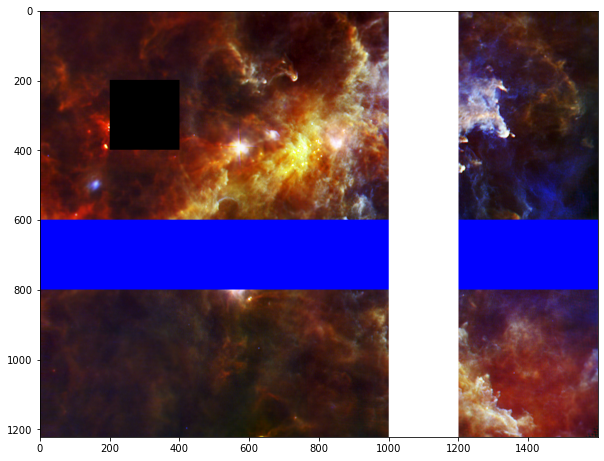

In [31]:
photo[200:400, 200:400, :] = 0
#set black for all pixels in given coordinates

plt.figure(figsize=(10,10))
plt.imshow(photo)

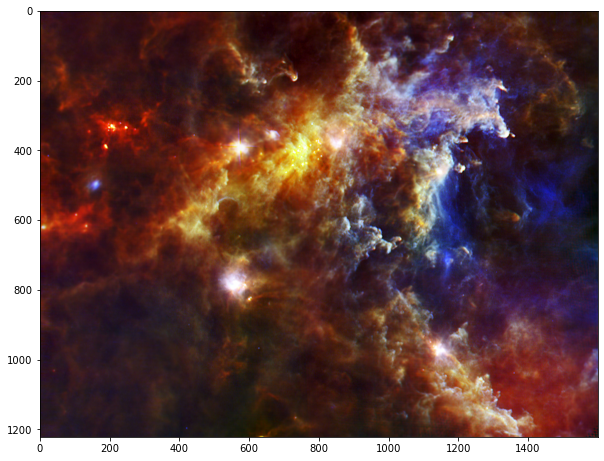

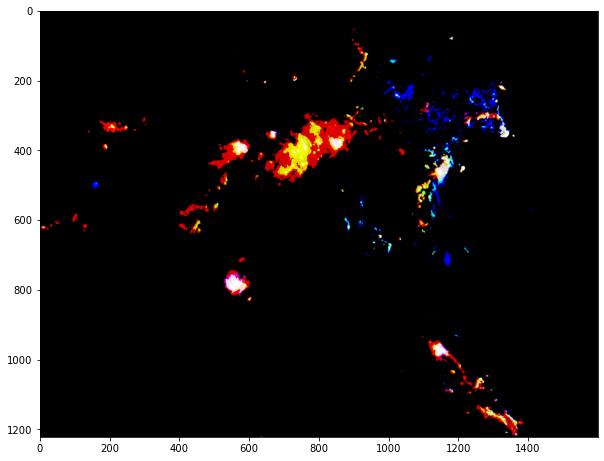

In [34]:
photo = imageio.imread('rosette_herschel_hi.jpg')
#uploading again for having clear version

plt.figure(figsize=(10,10))
plt.imshow(photo)

low_values = photo < 200
photo[low_values] = 0
#filter out pixels with low values and make them black

plt.figure(figsize=(10,10))
plt.imshow(photo)

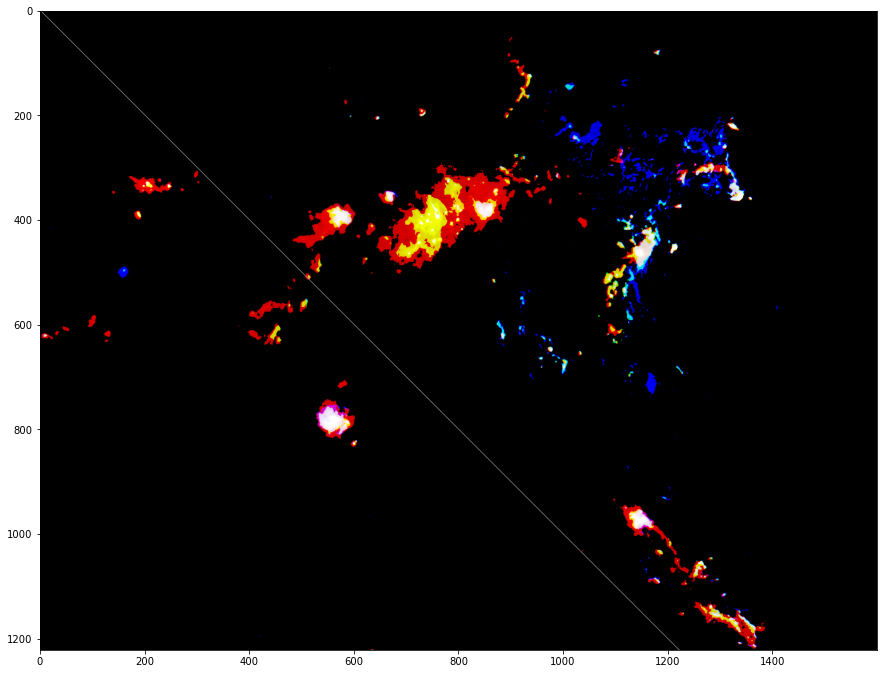

In [35]:
rows_range = np.arange(len(photo))
cols_range = rows_range
#take length of rows and set same value for row_range and col_range variables

photo[rows_range, cols_range] = 255
#make those coordinates white which will give us a diagonal white line

plt.figure(figsize=(15,15))
plt.imshow(photo)

In [37]:
total_rows, total_cols, total_layers = photo.shape
#assigning dimensions to seperate variables

X, Y = np.ogrid[:total_rows, :total_cols]
#assigning X and Y axises

In [38]:
center_row, center_col = total_rows / 2, total_cols / 2
#getting centers of X and Y axises of photo

dist_from_center = (X - center_row)**2 + (Y - center_col)**2
#getting distances from center
radius = (total_rows / 2)**2
#getting radius
circular_mask = (dist_from_center > radius)
#creating circular_mask which will check the pixels if they will be inside the circle

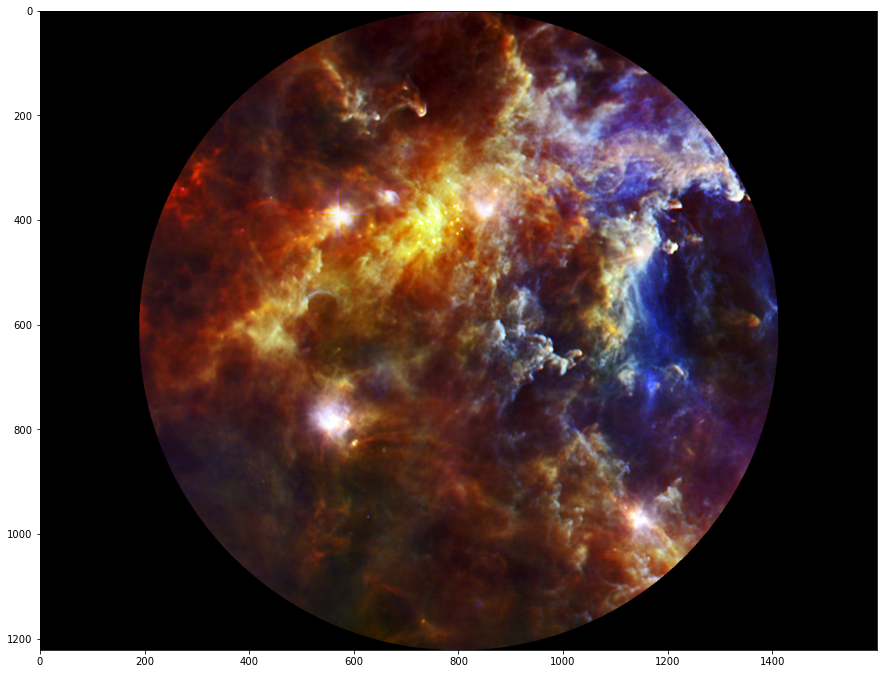

In [40]:
photo = imageio.imread('rosette_herschel_hi.jpg')
photo[circular_mask] = 0
#make pixels out of circle black

plt.figure(figsize=(15,15))
plt.imshow(photo)

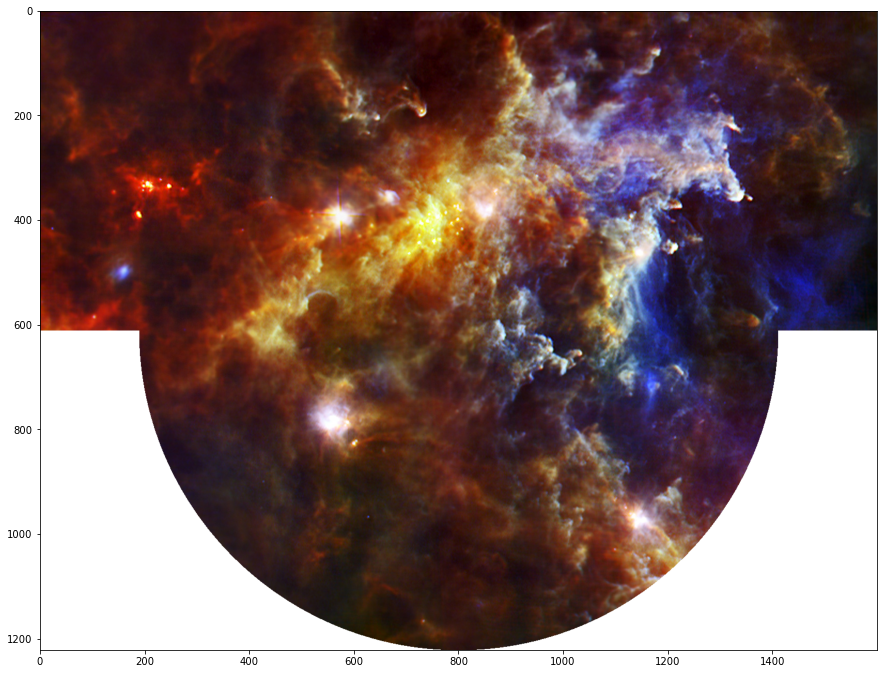

In [42]:
X, Y = np.ogrid[:total_rows, :total_cols]
half_lower = X > center_row 
#generate mask for half_lower

half_lower_mask = np.logical_and(half_lower, circular_mask)
#creating mask

photo = imageio.imread('rosette_herschel_hi.jpg')

photo[half_lower_mask] = 255
#make out of half_lower circle parts white

plt.figure(figsize=(15,15))
plt.imshow(photo)

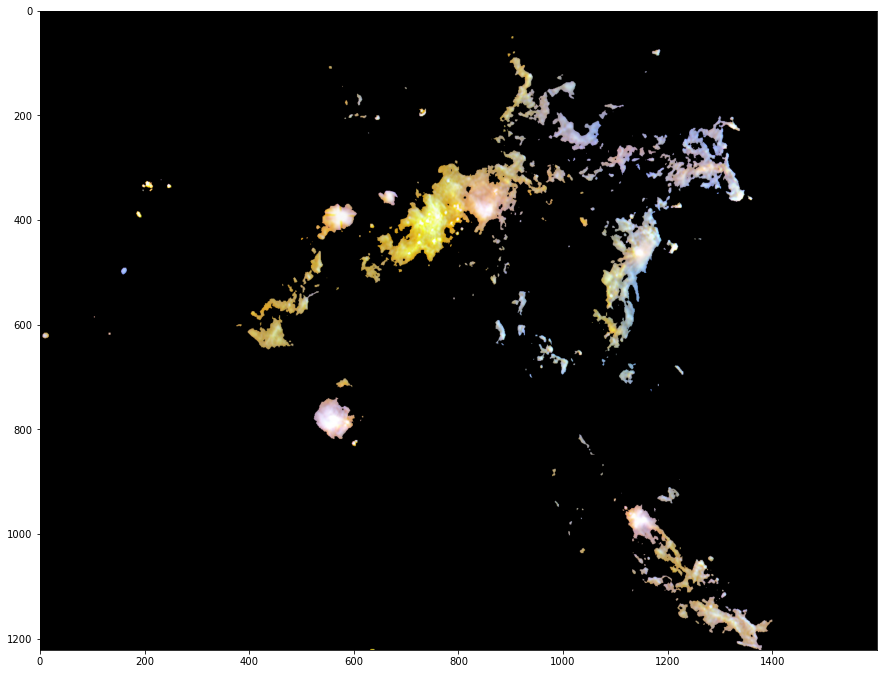

In [45]:
photo = imageio.imread('rosette_herschel_hi.jpg')
green_mask   = photo[:, : ,1] < 150
#creating green mask by searching pixels less than 150 green value

photo[green_mask] = 0
#make those pixels black

plt.figure(figsize=(15,15))
plt.imshow(photo)

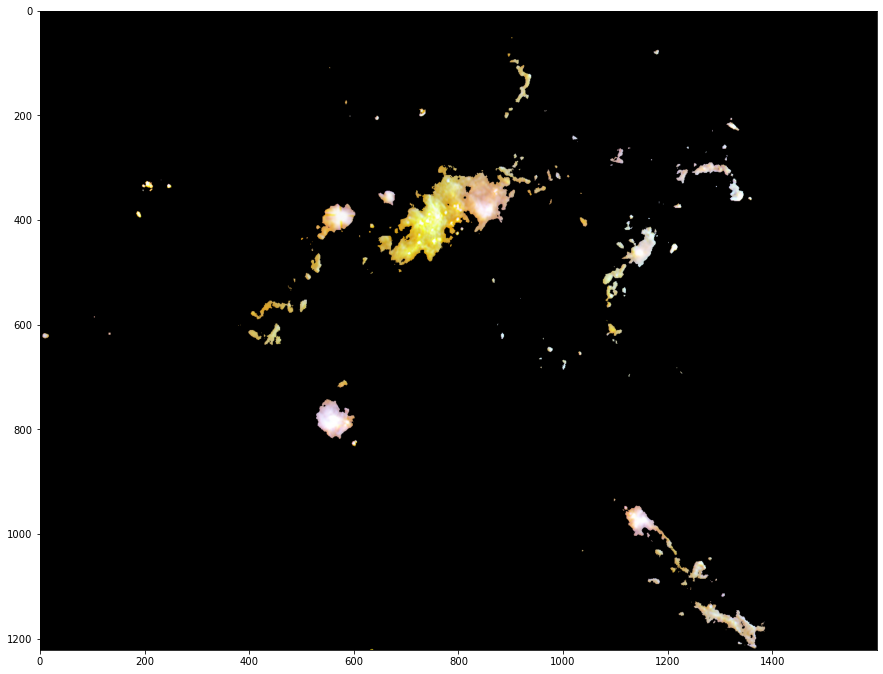

In [47]:
red_mask   = photo[:, : ,0] < 200
green_mask = photo[:, : ,1] > 100
blue_mask  = photo[:, : ,2] < 200

final_mask = np.logical_and(red_mask, green_mask, blue_mask)
#final_mask for sorting out all 3 color masks

photo[final_mask] = 0
plt.figure(figsize=(15,15))
plt.imshow(photo)

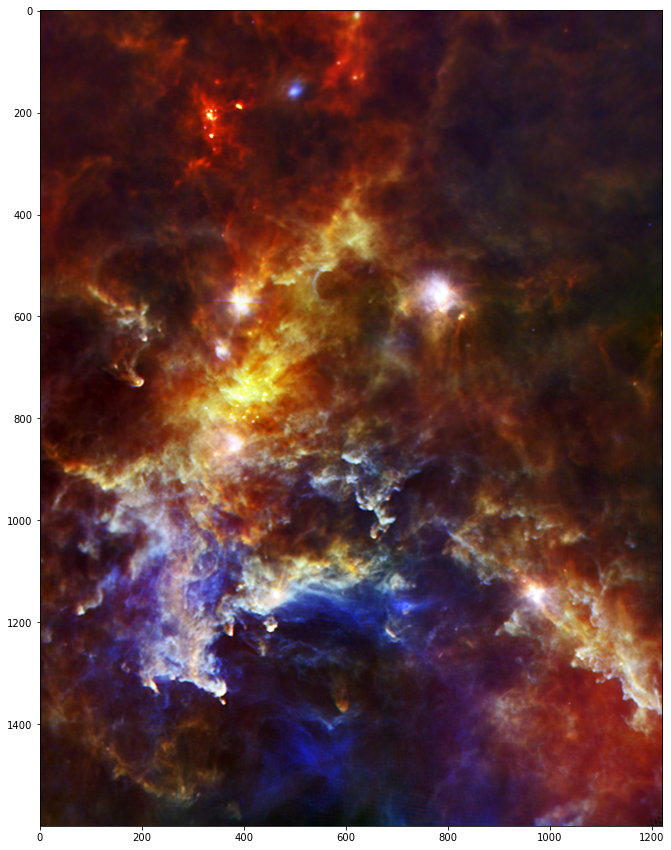

In [49]:
photo = imageio.imread('rosette_herschel_hi.jpg')

plt.figure(figsize=(15,15))
plt.imshow(np.swapaxes(photo, 0, 1))
#swapping x and y axises of photo

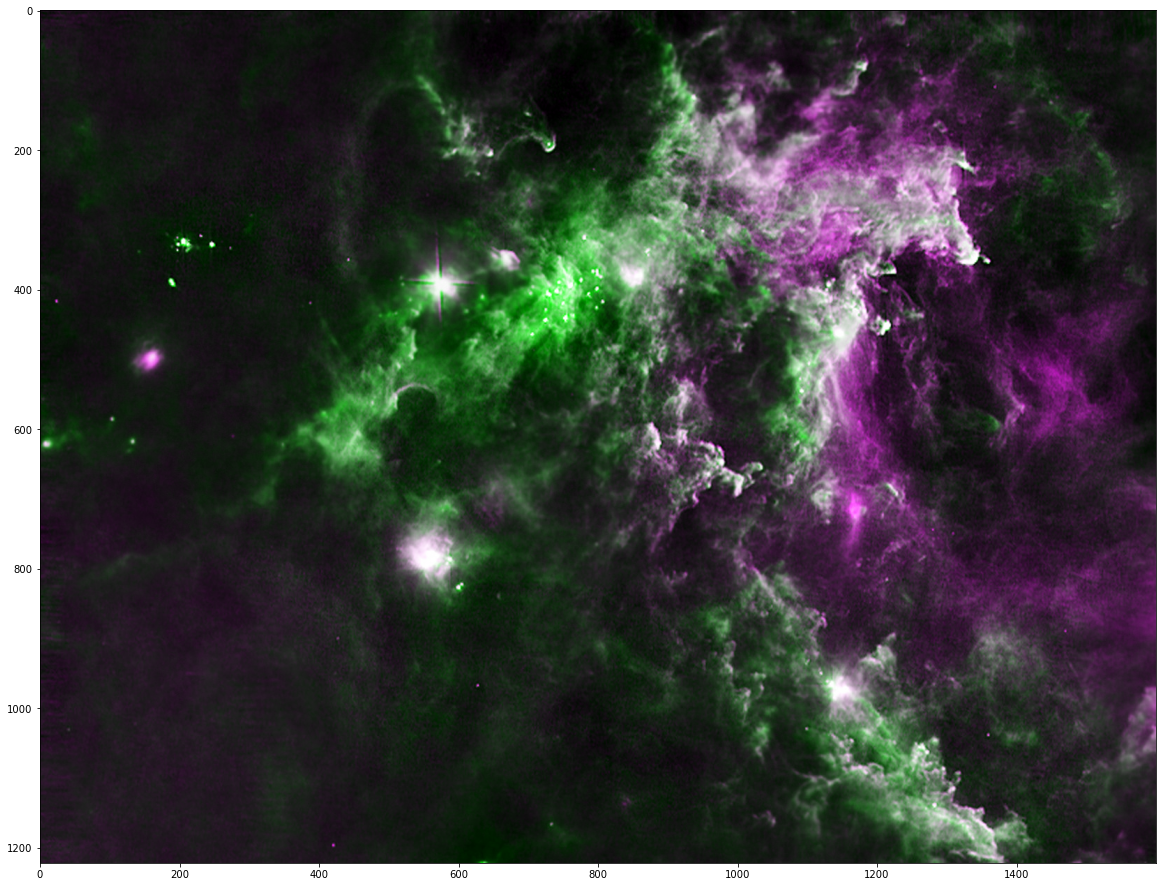

In [7]:
photo[:, :, 0], photo[:, :, 1], photo[:, :, 2] = photo[:, :, 2], photo[:, :, 1], photo[:, :, 0]
#changing color values for each pixel in a reverse order, smth like making rgb = bgr

plt.figure(figsize=(20,20))
plt.imshow(photo)